# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [119]:
import cv2 
import os, glob

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [120]:
# Image data directories
image_dir_training = "images/day_night_images/training/"
image_dir_test = "images/day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

This function loads in images and their labels and places them in a list. The list contains all images and their associated labels. For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list

In [121]:
def load_dataset(image_dir):
    
    # Populate this empty image list
    im_list = []
    image_types = ["day", "night"]
    
    # Iterate through each color folder
    for im_type in image_types:
        
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            # Read in the image
            im = cv2.imread(file)
            
            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))

    return im_list




For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.

In [122]:
# Load training data
image_list = load_dataset(image_dir_training)

## Visualize sample day and night images

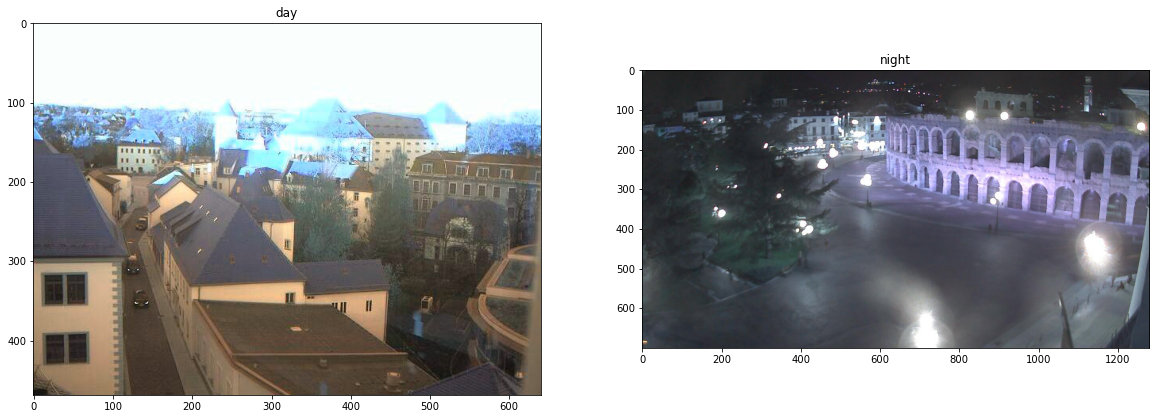

In [123]:
# Select an image and its label by list index

image_index = 6
selected_image = image_list[image_index][0]
selected_label = image_list[image_index][1]


image_indexn = 120
selected_imagen = image_list[image_indexn][0]
selected_labeln = image_list[image_indexn][1]

f, (day, night) = plt.subplots (1, 2, figsize=(20,10))
day.set_title(selected_label)
day.imshow(selected_image, cmap='gray')
night.set_title(selected_labeln)
night.imshow(selected_imagen, cmap='gray')


## TODO: Create a subplot of a day image and a night image. The titles should consist of the shape and label
# of the image

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [124]:
## Standardize the output using both functions above, standardize the input images and output labels
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        # pass
        newLabel = 0
        width = 1000
        height = 600
        dim = (width, height)
        
        # Resize the image to a specific width and height using cv2.resize

        itemR = cv2.resize(item[0], dim)
        
        # standard_list[item] = cv2.resize(image_list[item][0], dim, interpolation = cv2.INTER_AREA)
        
        # Create a numerical label based on the string label of the image: day should be 1, night should be 0
        if(item[1] == 'day'):
            newLabel = 1
        else:
            newLabel = 0
        # Append the image, and it's label to the full, processed list of image data
        #Creates a Tupple
        res=(itemR,newLabel)

        standard_list.append(res)
        
    return standard_list

In [125]:
# Standardize all training images

STANDARDIZED_LIST = standardize(image_list)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: ((600, 1000, 3))
Label [1 = day, 0 = night]: 1


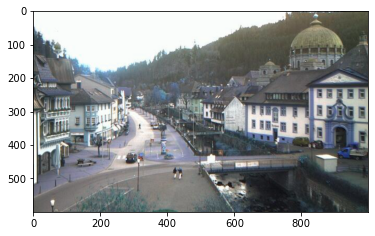

In [126]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print(f"Shape: ({selected_image.shape})")
print(f"Label [1 = day, 0 = night]: {selected_label}")

# Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


---
###  Find the average brightness using the V channel

This function takes in a **standardized** RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [127]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    ## TODO: Get the average brightness from an image using the HSV color space.

    # Convert image to HSV
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    #Separamos el canal de value
    value = hsv_image[:,:,2]
    # Add up all the pixel values in the V channel
    valueSum = np.sum(value)
       
    # find the avg
    area = rgb_image.shape[0] * rgb_image.shape[1]

    avg = valueSum/area
    
    return avg

Avg brightness: 119.62304833333333


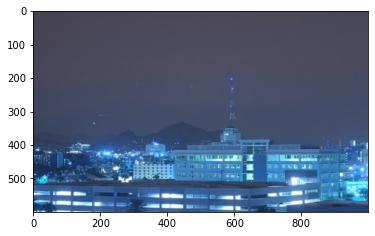

In [128]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print(f"Avg brightness: {avg}")
plt.imshow(test_im)

# Classification and Visualizing Error

In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

---
### Build a complete classifier 

Complete this code so that it returns an estimated class label given an input RGB image.

In [129]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    ## TODO: Use the avg brightness feature to predict a label (0, 1)
    # Extract average brightness feature from an RGB image 
    image = rgb_image
    predicted_label = 0

    avg = avg_brightness(image)
    
    
    # Define a threshold value
    threshold = 120
    
    # if the average brightness is above the threshold value, we classify it as "day"
    if avg > threshold: 
        predicted_label = 1
    else:
        predicted_label = 0
    # else, the pred-cted_label can stay 0 (it is predicted to be "night")
    
    return predicted_label    
    

## Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook!

Since we are using a pretty simple brightess feature, we may not expect this classifier to be 100% accurate. We'll aim for around 75-85% accuracy usin this one feature.


### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [130]:
import random

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)


## Determine the Accuracy

Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `misclassified`.

In [131]:
# Constructs a list of misclassified images given a list of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        ## TODO:
        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        # print(true_label)
        # print(predicted_label)
        
        if true_label != predicted_label: 
            res = (im,predicted_label,true_label)
            misclassified_images_labels.append(res)
        # If these labels are not equal, the image has been misclassified. Append a tuple of
        # image, prediction, and true label to the misclassified list.
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


In [134]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

## TODO: Calculate the accuracy of the classifier. Accuracy = number of correct / total number of images
# Accuracy calculations

misclassified = len(MISCLASSIFIED)
total = len(TEST_IMAGE_LIST)
accuracy = (total - misclassified)/total

print(f"Accuracy: {accuracy}")
print(f"Number of misclassified images = {len(MISCLASSIFIED)}  out of {total}")

Accuracy: 0.86875
Number of misclassified images = 21  out of 160


---
<a id='task9'></a>
### Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify.

Misclassified label:  night
True label:  day


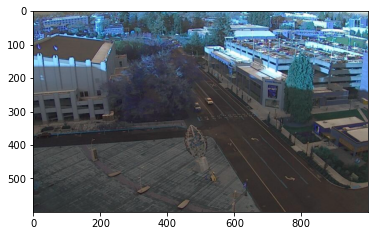

In [133]:
# Visualize misclassified example(s)

index = 18
misclassified_image = MISCLASSIFIED[index][0]
misclassified_label = MISCLASSIFIED[index][1]
misclassified_trueLabel = MISCLASSIFIED[index][2]


plt.imshow(misclassified_image)


if misclassified_label == 1: 
    misclassified_label = 'day'
else: 
    misclassified_label = 'night'

if misclassified_trueLabel == 1: 
    misclassified_trueLabel = 'day'
else: 
    misclassified_trueLabel = 'night'


print("Misclassified label: ", misclassified_label)

print("True label: ",misclassified_trueLabel)

## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified ass

        